# Natural Language Processing 
### CS-UH 2216 - Spring 2019
## Sentiment Analysis of 100,000 IMDB movie reviews
---


## Downloading the Imdb movie review data set

In [1]:
import warnings
import numpy as np
warnings.filterwarnings('ignore') 

import os

# The code below will check to see if the data directory exists; if not, it will download the data.
if os.path.exists("./aclImdb") == False:
    print("Downloading the Imdb movie review data set")
    !wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    !tar xf aclImdb_v1.tar.gz
#Shell command to show the files and directories we have under aclImdb
!ls aclImdb/*

aclImdb/imdbEr.txt  aclImdb/imdb.vocab	aclImdb/README

aclImdb/test:
labeledBow.feat  neg  pos  urls_neg.txt  urls_pos.txt

aclImdb/train:
labeledBow.feat  pos	unsupBow.feat  urls_pos.txt
neg		 unsup	urls_neg.txt   urls_unsup.txt


# 1. Analysis of data

In [2]:
#Run this cell first
print("number of positive training examples:")
pos_train = !ls aclImdb/train/pos/ | wc -l
pos_train = int(pos_train[0])
print(pos_train)
print("number of negative training examples:")
neg_train = !ls aclImdb/train/neg/ | wc -l
neg_train = int(neg_train[0])
print(neg_train)
print("number of unlabelled training examples:")
unl_train = !ls aclImdb/train/unsup/ | wc -l
unl_train = int(unl_train[0])
print(unl_train)
print("number of positive testing examples:")
pos_test = !ls aclImdb/test/pos/ | wc -l
pos_test = int(pos_test[0])
print(pos_test)
print("number of negative testing examples:")
neg_test = !ls aclImdb/test/pos/ | wc -l
neg_test = int(neg_test[0])
print(neg_test)

number of positive training examples:
12500
number of negative training examples:
12500
number of unlabelled training examples:
50000
number of positive testing examples:
12500
number of negative testing examples:
12500


#### 1.1 How many reviews are for training? 75000

In [3]:
print("total number of training reviews:" )
print(pos_train + neg_train + unl_train)

total number of training reviews:
75000


#### 1.2 How many reviews are for testing? 25000

In [4]:
print("total number of training reviews:" )
print(pos_test + neg_test)

total number of training reviews:
25000


#### 1.3 How many reviews are positive (in total in training and testing)? 25000

In [5]:
print("total positive instances in training and testing" )
print(pos_train + pos_test)

total positive instances in training and testing
25000


#### 1.4 How many reviews are negative (in total in training and testing)? 25000

In [6]:
print("total negative instances in training and testing" )
print(neg_train + neg_test)

total negative instances in training and testing
25000


#### 1.5 How many reviews are unlabelled (in total in training and testing)? 50000

In [7]:
print("total negative instances in training and testing" )
print(unl_train)

total negative instances in training and testing
50000


#### 1.6 What can we use unlabeled reviews for? 

We can use the unlabeled reviews for building unsupervised learning classification algorithms that can cluster and learn labels of reviews without being given the rating

#### 1.7 How was the positive/negative labeling done?

The positive and negative labels are classified based on the rating of the user reviews. A negative class is given to ratings <= 4 and a positive class is given to ratings >= 7 out of 10. Hence, reviews with more neural ratings are not included in the positive/negative sets

#### 1.8 Simply based on the labeling approach, do we expect some reviews to be harder than others for sentiment analysis?

Yes. This is because some reviews with the same label(pos/neg class) are closer to the extreme ends of the scale (1 ratings) while other reviews are closer to the neural end (4 rating). We would expect reviews with the same label but closer to the extreme end of the scale, to be easier to analyze because they likely have more obvious features which we can use for classification

#### 1.9 How many are the most negative review [1] (train and test)?

In [8]:
max_neg_test = !ls aclImdb/test/neg/ | grep "\w*1.txt" | wc -l
max_neg_test = int(max_neg_test[0])
max_neg_train = !ls aclImdb/train/neg/ | grep "\w*1.txt" | wc -l
max_neg_train = int(max_neg_train[0])
print("Total number of most negative reviews")
print(max_neg_test + max_neg_train)

Total number of most negative reviews
10122


#### 1.10 How many are the most positive reviews [10] (train and test)?

In [9]:
max_pos_test = !ls aclImdb/test/pos/ | grep "\w*10.txt" | wc -l
max_pos_test = int(max_pos_test[0])
max_pos_train = !ls aclImdb/train/pos/ | grep "\w*10.txt" | wc -l
max_pos_train = int(max_pos_train[0])
print("Total number of most positive reviews")
print(max_pos_test + max_pos_train)

Total number of most positive reviews
9731


## Load data to memory

In [10]:
import sklearn
from sklearn.datasets import load_files #load_files load text files with categories as subfolder names; 

# Directory of our data
traindir = r'./aclImdb/train'
testdir = r'./aclImdb/test'

# load pos/neg train and test data
train=load_files(traindir,categories=['pos','neg']) #load_files shuffles the text and categories by default.
test=load_files(testdir,categories=['pos','neg'])

# load an object with all the training data (positive, negative and unlabeled)
alltrain = load_files(traindir,categories=['pos','neg','unsup'])
#load_files return a dictionary-like object:
#1. 'data': the raw text data to learn
#2. 'target': the classification labels (integer index)
#3. 'target_names': the meaning of the labels
#4. 'filenames': the name of the file holding the data point

In [11]:
#Browse an example
#For example, if we want to see data point with index i 
i = 13374
print("Index  = %3d\n" % (i))
print("Text = %s\n" % (train.data[i]))
print("Label = %s\n" %(train.target_names[train.target[i]]))
print("Filename = %s\n" % (train.filenames[i]))

Index  = 13374

Text = b'Since this movie was based on a true story of a woman who had two children and was not very well-off, it was just scary as to how real it really was! The acting is what gave the movie that push to greatness.<br /><br />Diane Keaton portrayed the main character, Patsy McCartle who had two sons whom she adored. Her performance is what made the real life story come to life on a television screen. It was very hard to watch some of the scenes since they were so real as to what happens when one becomes addicted to drugs.<br /><br />Just watching this very loving mother go from sweet to not caring at all was hard, but so true. I have known people who have gone through withdrawl and it was very much like what happened in this movie, from what I remember.<br /><br />I also thought that it was very risky for the director to want to make a movie out of what happened to this woman. Yet it was done so well. I applaud the director for making this movie.<br /><br />I highly r

# 2. Investigating the quality of data

In [12]:
#Function to determine rating given the review filename
import re
def getRating(filename):
    match = re.search("_(.+).txt",filename)
    if match: #If we have found something
        return(int(match.group(1))) #Return the first capture group ()
    else:
        return None

In [13]:
def find_and_print_rating(rating):
    #listing filename, label, and at least the first 10 words of text
    for i in range(len(train.filenames)):
        if(getRating(train.filenames[i]) == rating):
            print("Label = %s" %(train.target_names[train.target[i]]))
            print("Filename: ", train.filenames[i])
            print("Rating: ", getRating(train.filenames[i]))
            print("Text: ", train.data[i][0:200])
            break

#### 2.1 Identify an example of a strong negative sentiment based on human ratings

In [14]:
find_and_print_rating(1)

Label = neg
Filename:  ./aclImdb/train/neg/6802_1.txt
Rating:  1
Text:  b"Words can't describe how bad this movie is. I can't explain it by writing only. You have too see it for yourself to get at grip of how horrible a movie really can be. Not that I recommend you to do th"


#### 2.2 Identify an example of a weak negative sentiment based on human ratings

In [15]:
find_and_print_rating(4)

Label = neg
Filename:  ./aclImdb/train/neg/9503_4.txt
Rating:  4
Text:  b'Also known in a different form as "House of Exorcism," this messy<br /><br />little film takes itself so seriously as to kill any entertainment value<br /><br />whatsoever.<br /><br />The spare plot i'


#### 2.3 Identify an example of a strong positive sentiment based on human ratings

In [16]:
find_and_print_rating(10)

Label = pos
Filename:  ./aclImdb/train/pos/11485_10.txt
Rating:  10
Text:  b'Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of be'


#### 2.4 Identify an example of a weak positive sentiment based on human ratings 

In [17]:
find_and_print_rating(7)

Label = pos
Filename:  ./aclImdb/train/pos/9846_7.txt
Rating:  7
Text:  b'Ok, at the beginning it looked like "Shrek" - the loner that is persistently followed by the comic relief. Then it evolves into something really compelling, as the gauntlet is set. And the result is a'


#### 2.5 List one observation of a feature of the text that you think will be helpful to predict sentiment.

It seems that the choice of vocabulary seems to be correlated with the rating of the review. Certain vocabulary such as "Horrible" are seen significantly more frequently in negative instances than in positive instances

In [18]:
#Number of reviews with "Horrible" in contents.
negativeOccurances = 0
positiveOccurances = 0
for i in range(len(train.filenames)):
    if(train.target_names[train.target[i]] == 'pos'):
        if 'horrible' in str(train.data[i]):
            positiveOccurances += 1
    else:
        if 'horrible' in str(train.data[i]):
            negativeOccurances += 1
print("Number of times \"horrible\" appeared in negative reviews: ", negativeOccurances)
print("Number of times \"horrible\" appeared in positive reviews: ", positiveOccurances)

Number of times "horrible" appeared in negative reviews:  796
Number of times "horrible" appeared in positive reviews:  150


# 3. Building a basic sentiment analyzer

Vectorize our text data

In [19]:
from sklearn.feature_extraction.text import CountVectorizer #Vectorize our text with top 1000 frequent vocabulary

In [20]:
#Create the vectorizer and transform our data
vectorizer = CountVectorizer(max_features=1000,analyzer='word',lowercase=True) #Tokenize at word level
vectorizer.fit(alltrain.data)
train_data_vectorized = vectorizer.transform(train.data)

Implement a logistic linear regression model

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(train_data_vectorized, train.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Predict with the model

In [22]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
test_pred = model.predict(vectorizer.transform(test.data))
#Preliminary evaluation with sklearn
print ("Accuracy  = %3.2f%%" % (100*accuracy_score(test.target, test_pred)))
print ("Average Precision = %3.2f%%" % (100*precision_score(test.target, test_pred, average='macro')))
print ("Average Recall    = %3.2f%%" % (100*recall_score(test.target, test_pred, average='macro')))
print ("Average F1-score  = %3.2f%%" % (100*f1_score(test.target, test_pred, average='macro')))
# The scores for accuracy, and average precision, recall and F1-score are similar. 
# This is in part an effect of the balanced nature of the data.

Accuracy  = 85.96%
Average Precision = 85.97%
Average Recall    = 85.96%
Average F1-score  = 85.95%


### 3.1 Evaluating Accuracy, Recall and F1 scores without sklearn

In [23]:
#Record the instances of correct and incorrect predictions
num_neg = 0
num_pos = 0
neg_correct = 0
neg_incorrect = 0
pos_correct = 0
pos_incorrect = 0

for i in range(len(test.target)):
    if test.target[i] == 0:
        num_neg +=1
        if test_pred[i] == 0:
            neg_correct += 1
        elif test_pred[i] == 1:
            neg_incorrect += 1
    elif test.target[i] == 1:
        num_pos += 1
        if test_pred[i] == 0:
            pos_incorrect += 1
        elif test_pred[i] == 1:
            pos_correct += 1

print("Total instances %d" % (num_neg + num_pos))
print("Total correct predictions %d" % (pos_correct + neg_correct) )
print("Correctly predicted negative %d" % (neg_correct))
print("Incorrectly predicted negative %d" % (neg_incorrect))
print("Correctly predicted positive %d" % (pos_correct))
print("Incorrectly predicted positive %d" % (pos_incorrect))

Total instances 25000
Total correct predictions 21489
Correctly predicted negative 10617
Incorrectly predicted negative 1883
Correctly predicted positive 10872
Incorrectly predicted positive 1628


In [24]:
#Accuracy = Correctly predicted / Total
Accuracy = (pos_correct + neg_correct)/(num_neg + num_pos)
print("Accuracy: %2.2f%%" % (100*Accuracy))
print()

#Neg label precision = neg_correct / (neg_correct + pos_incorrect)
neg_precision = neg_correct / (neg_correct + pos_incorrect)
print("Neg label precision: %2.2f%%" % (100*neg_precision))

#Recall of Neg = neg_correct / num_neg
neg_recall = neg_correct / num_neg
print("Neg label recall: %2.2f%%" % (100*neg_recall))

#F1-score harmonic mean of precision and recall. = 
neg_f1 = 1/( ((1/neg_precision)+(1/neg_recall))/2 )
print("Neg F1 score: %2.2f%%" % (100*neg_f1))
print()

#Pos label precision = pos_correct / (pos_correct + neg_incorrect)
pos_precision = pos_correct / (pos_correct + neg_incorrect)
print("Pos label precision: %2.2f%%" % (100*pos_precision))

#Recall of Pos = pos_correct / num_pos
pos_recall = pos_correct / num_pos
print("Pos label recall: %2.2f%%" % (100*pos_recall))

#F1-score harmonic mean of precision and recall. = 
pos_f1 = 1/( ((1/pos_precision)+(1/pos_recall))/2 )
print("Pos F1 score: %2.2f%%" % (100*pos_f1))
print()

print("Average precision %2.2f" % (100*(neg_precision + pos_precision)/2))
print("Average recall %2.2f" % (100*(neg_recall + pos_recall)/2))
print("Average F1 score %2.2f%%" % (100*(neg_f1 + pos_f1)/2))

Accuracy: 85.96%

Neg label precision: 86.70%
Neg label recall: 84.94%
Neg F1 score: 85.81%

Pos label precision: 85.24%
Pos label recall: 86.98%
Pos F1 score: 86.10%

Average precision 85.97
Average recall 85.96
Average F1 score 85.95%


# 4. Individual accuracies

### 4.1 Accuracy for each rating (1-4, 7-10)

In [25]:
ratingCorrect = dict()
ratingIncorrect = dict()
ratings = [1,2,3,4,7,8,9,10]
#Initialize the ratings
for rating in ratings:
    ratingCorrect[rating] = 0
    ratingIncorrect[rating] = 0
    
#Count correct and incorrect instances
for i in range(len(test.target)):
    rating = getRating(test.filenames[i])
    if test.target[i] == test_pred[i]:
        ratingCorrect[rating] += 1
    else:
        ratingIncorrect[rating] += 1

# Print the accuracy.
for rating in ratings:
    print("Rating %d accuracy: %2.2f" % (rating, 100*ratingCorrect[rating]/(ratingCorrect[rating]+ratingIncorrect[rating])))
    if rating == 4:
        print() #Print a space betwen "positive" and "negative" ratings

Rating 1 accuracy: 91.48
Rating 2 accuracy: 87.62
Rating 3 accuracy: 81.74
Rating 4 accuracy: 73.21

Rating 7 accuracy: 79.11
Rating 8 accuracy: 85.40
Rating 9 accuracy: 89.46
Rating 10 accuracy: 90.34


We observe that our performance increases near the extreme for the negative class (1) and the extreme for the positive class (10). The performance decreases when the ratings are more neural and close to the center of the scale. This was predicted earlier in § 1.8

### 4.2 Data samples for each instance in the cofusion matrix (TP FP FN TN)

Let's analyze instances of TN(Neg Neg) FP (Neg Pos) FN(Pos Neg) and TP (Pos Pos)

In [26]:
def getInstance(gold, pred):
    for i in range(len(test.target)):
        if test.target[i] == gold and test_pred[i] == pred:
            return(i)
    return(-1)

In [27]:
print("True negative")
instance = getInstance(0,0)
print("Gold: Neg | Predicted: Neg | Match: Correct | Rating: ", getRating(test.filenames[instance]))
print("Text:")
print(test.data[instance])
print()

True negative
Gold: Neg | Predicted: Neg | Match: Correct | Rating:  1
Text:
b'I don\'t know how this movie has received so many positive comments. One can call it "artistic" and "beautifully filmed", but those things don\'t make up for the empty plot that was filled with sexual innuendos. I wish I had not wasted my time to watch this movie. Rather than being biographical, it was a poor excuse for promoting strange and lewd behavior. It was just another Hollywood attempt to convince us that that kind of life is normal and OK. From the very beginning I asked my self what was the point of this movie,and I continued watching, hoping that it would change and was quite disappointed that it continued in the same vein. I am so glad I did not spend the money to see this in a theater!'



This negative example was correctly predicted negatively. Since we are analyzing word frequency, this review has a lot of words such as "dissapointed" "poor" "attempt" and "wasted" which would have likely pushed the algorithm to predict a negative classification

In [28]:
print("False positive")
instance = getInstance(0,1)
print("Gold: Neg | Predicted: Pos | Match: Incorrect | Rating: ", getRating(test.filenames[instance]))
print("Text:")
print(test.data[instance])
print()

False positive
Gold: Neg | Predicted: Pos | Match: Incorrect | Rating:  4
Text:
b"Even Disney are guilty of the cash cow disease, after the roaring success of The Love Bug in 1968, the house of mouse cashed in with Herbie Rides Again, Herbie Goes To Monte Carlo, and Herbie Goes Bananas. Neither sequel capturing the charm and inoffensive appeal of The Love Bug back in 68, in this one we find race driver Jim Douglas and his sidekick Wheely Applegate, entering Herbie in the Monte Carlo Rally. Naturally things outside of the race start to take over priorities, they get mixed up in a diamond robbery and Herbie falls in love with another car!. The car stunts are of course pleasant and easy on the eye, and it would be churlish of me to really vent venom on such a friendly piece of fluff, it's just that the film goes nowhere fast and personally now i can see it for the coin motivated piece of work it is. Still you get to see Herbie take a bath, foil the baddies and of course dance for the lady

This example was predicted to be positive when it was negative. First this example was a difficult review to classify as it's rating was quite near the center (4). Second, the review uses a lot of vocabulary such as "love" "pleasant" "charm" frequently which indicate that the reviewed liked the movie. The model doesn't know that the reviewer could be describing the contents of the movie

In [29]:
print("False negative")
instance = getInstance(1,0)
print("Gold: Pos | Predicted: Neg | Match: Incorrect | Rating: ", getRating(test.filenames[instance]))
print("Text:")
print(test.data[instance])
print()

False negative
Gold: Pos | Predicted: Neg | Match: Incorrect | Rating:  7
Text:
b"The casting of Robert Culp is probably the only decent move the production team made with this film. Falk and Culp were marvellous, but as culp was not Falks nemesis this time, chemistry was lacking. Columbo is only as strong as his opposite number, and this time he didn't have one."



Similar to the above review, this review was also close to the center of the scale. In addition, even as a human reading the review, it would be difficult to predict the correct rating. The words used in this review doesn't indicate clearly that it is positive.

In [30]:
print("True positive")
instance = getInstance(1,1)
print("Gold: Pos | Predicted: Pos | Match: Correct | Rating: ", getRating(test.filenames[instance]))
print("Text:")
print(test.data[instance])

True positive
Gold: Pos | Predicted: Pos | Match: Correct | Rating:  9
Text:
b"Don't hate Heather Graham because she's beautiful, hate her because she's fun to watch in this movie. Like the hip clothing and funky surroundings, the actors in this flick work well together. Casey Affleck is hysterical and Heather Graham literally lights up the screen. The minor characters - Goran Visnjic {sigh} and Patricia Velazquez are as TALENTED as they are gorgeous. Congratulations Miramax & Director Lisa Krueger!"


This review was correctly predicted positive. It's likely because of the positive words used "fun", "work well" and "congratulations"

# 5. Investigating the effect of training size on accuracy

We increment the training size from 1000 to 25000 in increments of 1000 and examine the increase in accuracy as we increase the training size

In [31]:
#Create the vectorizer
vectorizer = CountVectorizer(max_features=1000,analyzer='word',lowercase=True) #Tokenize at word level
vectorizer.fit(alltrain.data)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [32]:
#Train the model with varying sizes of train data
F1list = [] #Track the F1 scores
trainSize = [] #Track our training size
for i in range(1,26):
    trainSize.append(i*1000)
    #Create a model
    model = LogisticRegression(solver='liblinear')
    #Train with our dataset
    model.fit(vectorizer.transform(train.data[0:i*1000]), train.target[0:i*1000])
    #Vectorize our test data.
    test_pred = model.predict(vectorizer.transform(test.data))
    #Determine our F1 score
    F1 = 100*f1_score(test.target, test_pred, average='macro')
    print ("Training size: %d Average F1-score: %3.2f%%" % (i*1000, F1))
    F1list.append(F1)

Training size: 1000 Average F1-score: 77.57%
Training size: 2000 Average F1-score: 79.22%
Training size: 3000 Average F1-score: 79.96%
Training size: 4000 Average F1-score: 80.56%
Training size: 5000 Average F1-score: 81.76%
Training size: 6000 Average F1-score: 82.57%
Training size: 7000 Average F1-score: 82.83%
Training size: 8000 Average F1-score: 83.71%
Training size: 9000 Average F1-score: 84.24%
Training size: 10000 Average F1-score: 84.52%
Training size: 11000 Average F1-score: 84.58%
Training size: 12000 Average F1-score: 84.76%
Training size: 13000 Average F1-score: 84.97%
Training size: 14000 Average F1-score: 85.18%
Training size: 15000 Average F1-score: 85.33%
Training size: 16000 Average F1-score: 85.59%
Training size: 17000 Average F1-score: 85.51%
Training size: 18000 Average F1-score: 85.68%
Training size: 19000 Average F1-score: 85.70%
Training size: 20000 Average F1-score: 85.72%
Training size: 21000 Average F1-score: 85.82%
Training size: 22000 Average F1-score: 85.9

In [33]:
import matplotlib.pyplot as plt
import numpy as np

#Function to plot trainsize vs Fscore
def plotTrainsizeFscore(trainSize,F1list):
    plt.figure(figsize=(8, 4)) 
    plt.plot(trainSize,F1list,color='blue')
    plt.xlabel('Training size', fontsize=10)
    plt.ylabel('F-score %', fontsize=10)
    plt.title('Learning Curve',fontsize=10)
    plt.show()

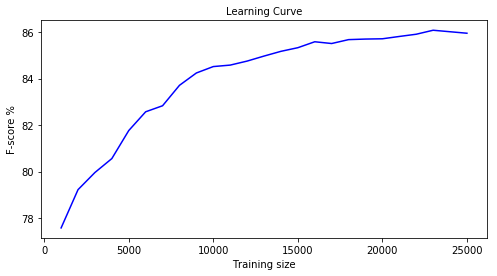

In [34]:
#Plot our F1 against data Size
plotTrainsizeFscore(trainSize,F1list)

I observe that our logistic regression model was suprisingly accurate even when training even with a minimal of 1000 samples. It seems that given only 1000 samples, our model could identify the sentiment relatively well

I observe that as the training size increases, the F1 score of the model increases. For example, with only 1000 training samples we can achieve an accuracy of 77.6% while with 5,000 training samples we can achieve a score of 81.8%. This is to be expected because the more training examples we have, the better the predicting capability and generalization to the unseen test the model is.

I also observe that as the training size increases, the rate of gain in F1 of adding on an additional 1000 sample decreased. Simply put the F1 score did not increase linearlly to the size of the Training. There appears to be a log relationship.

Between 1000 and 2000 examples, the F score increased 1.65% Between 2000 and 4000 it increased 1.34%. Between 4000 and 8000 it increased 3.15%. Between 8000 and 16000 it increased 1.88%. 

Following this observed relationship, I would expect an increase of around 2% for every doubling in training size. Hence, I expect an increase of another 2% to 88% if we add another 25000 examples. (Although this is not guranteed)


# 6. Investigating the effect of featureSize and trainingSize

The training size varies in increments of 5000 while our feature size (words) varies between 100, 1000 and 10000

Vectorzing with 100 features
Training size: 1000 Average F1-score: 69.86%
Training size: 5000 Average F1-score: 72.74%
Training size: 10000 Average F1-score: 73.22%
Training size: 15000 Average F1-score: 73.32%
Training size: 20000 Average F1-score: 73.42%
Training size: 25000 Average F1-score: 73.22%
Learning curve plot vectorized with 100


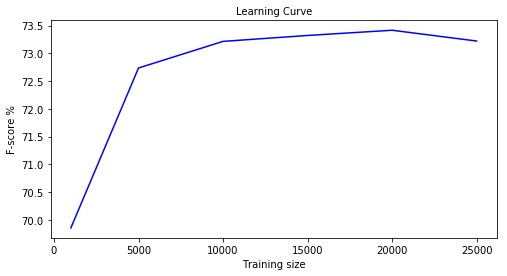

Vectorzing with 1000 features
Training size: 1000 Average F1-score: 77.57%
Training size: 5000 Average F1-score: 81.76%
Training size: 10000 Average F1-score: 84.52%
Training size: 15000 Average F1-score: 85.33%
Training size: 20000 Average F1-score: 85.72%
Training size: 25000 Average F1-score: 85.95%
Learning curve plot vectorized with 1000


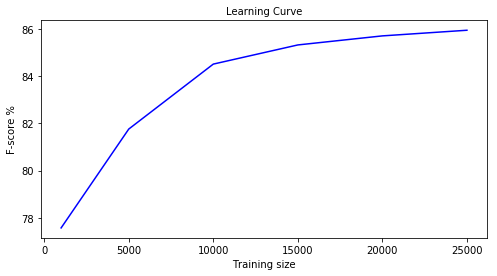

Vectorzing with 10000 features
Training size: 1000 Average F1-score: 79.78%
Training size: 5000 Average F1-score: 84.63%
Training size: 10000 Average F1-score: 85.14%
Training size: 15000 Average F1-score: 85.06%
Training size: 20000 Average F1-score: 85.40%
Training size: 25000 Average F1-score: 85.52%
Learning curve plot vectorized with 10000


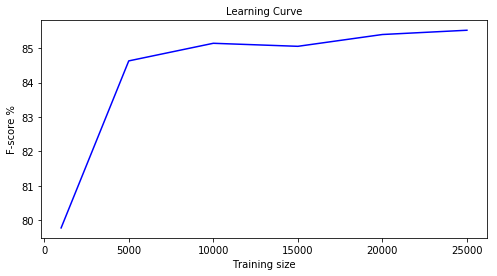

In [35]:
for featureSize in [100, 1000, 10000]:
    print("Vectorzing with %d features" % (featureSize))
    #Create the vectorizer
    vectorizer = CountVectorizer(max_features=featureSize,analyzer='word',lowercase=True) #Tokenize at word level
    vectorizer.fit(alltrain.data)

    #Train the model with varying sizes of train data
    F1list = [] #Track the F1 scores
    trainSize = [] #Track our training size
    for i in [1,5,10,15,20,25]:
        trainSize.append(i*1000)
        #Create a model
        model = LogisticRegression(solver='liblinear')
        #Train with our dataset
        model.fit(vectorizer.transform(train.data[0:i*1000]), train.target[0:i*1000])
        #Vectorize our test data.
        test_pred = model.predict(vectorizer.transform(test.data))
        #Determine our F1 score
        F1 = 100*f1_score(test.target, test_pred, average='macro')
        print ("Training size: %d Average F1-score: %3.2f%%" % (i*1000, F1))
        F1list.append(F1)
        
    #Plot our F1 against data Size
    print("Learning curve plot vectorized with %d" % (featureSize))
    plotTrainsizeFscore(trainSize,F1list)

This was an interesting investigation. We learnt from §5 that as the training size increases, the F-score increases (although non-linearly). In this section, we conducted the same training size variation, but using different levels of features (words) namely features of 100, 1000 and 10000. What I observed was that not only did the F1-score change, but the profile of the training curve also changed with different number of features.

First, using only 100 word features, we see that the F1 score at with a training_size of 1000 was the lowest at 69.86%. With 1000 word features, this increased to 77.57% and with 10,000 this climbed to 79.78%. It seems that as the number of word features increase, the F-score also increases. 

However, this holds less weight when we train with the full training_size of 25000. At 100 word features, the F1 score was 73.22% and at 1000 features increased to 85.95% as expected. However, with 10,000 features, the score actually decreased to 85.52%.This could suggest that there are only a certain number of "indicator" words utilized by our model. After around 1000 features, most of the additional features are perhaps not useful to our predictor. In addition having more features could result in overfitting of our model. This means that after training, our model will generalize less well to the unseen test set.

The learning curve profile also varied between different feature settings. For instance, with 100 features, the model quickly learnt the most optimal model. After 5000-10000 training examples, the model did not imrpove the score. It suggests that maybe the model learnt the most optimal parameters. Furthurmore, this score actually dropped after 20,000 instances suggesting either overfitting or lack of features to search over since the feature space is so constrained.

With 1000 features, the model could continually and gradually improve its score with added training. 

# 7. Investigating the effect of TfidVectorizer, and MultinomialNaiveBayes model and training size

In [36]:
#Importing our vectorizer and model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [37]:
#CountVectorizer and LogisticRegression
vectorizer = CountVectorizer(max_features=1000,analyzer='word',lowercase=True)
vectorizer.fit(alltrain.data)
print("Vectorized with CountVectorizer and trained with LogisticRegression algorithm")
for trainSize in [1000, 5000, 25000]:
    model = LogisticRegression(solver='liblinear')
    model.fit(vectorizer.transform(train.data[0:trainSize]), train.target[0:trainSize])
    #Vectorize our test data.
    test_pred = model.predict(vectorizer.transform(test.data))
    #Determine our F1 score
    F1 = 100*f1_score(test.target, test_pred, average='macro')
    print("Training size: %d Average F1-score: %3.2f%%" % (trainSize, F1))

Vectorized with CountVectorizer and trained with LogisticRegression algorithm
Training size: 1000 Average F1-score: 77.57%
Training size: 5000 Average F1-score: 81.76%
Training size: 25000 Average F1-score: 85.95%


In [38]:
#CountVectorizer and MultinomialNaiveBayes
vectorizer = CountVectorizer(max_features=1000,analyzer='word',lowercase=True)
vectorizer.fit(alltrain.data)
print("Vectorized with CountVectorizer and trained with MultinomialNaiveBayes algorithm")
for trainSize in [1000, 5000, 25000]:
    model = MultinomialNB()
    model.fit(vectorizer.transform(train.data[0:trainSize]), train.target[0:trainSize])
    #Vectorize our test data.
    test_pred = model.predict(vectorizer.transform(test.data))
    #Determine our F1 score
    F1 = 100*f1_score(test.target, test_pred, average='macro')
    print("Training size: %d Average F1-score: %3.2f%%" % (trainSize, F1))

Vectorized with CountVectorizer and trained with MultinomialNaiveBayes algorithm
Training size: 1000 Average F1-score: 79.31%
Training size: 5000 Average F1-score: 80.68%
Training size: 25000 Average F1-score: 80.92%


In [39]:
#TfidVectorizer and MultinomialNaiveBayes
vectorizer = TfidfVectorizer(max_features=1000,analyzer='word',lowercase=True)
vectorizer.fit(alltrain.data)
print("Vectorized with TfidVectorizer and trained with MultinomialNaiveBayes algorithm")
for trainSize in [1000, 5000, 25000]:
    model = MultinomialNB()
    model.fit(vectorizer.transform(train.data[0:trainSize]), train.target[0:trainSize])
    #Vectorize our test data.
    test_pred = model.predict(vectorizer.transform(test.data))
    #Determine our F1 score
    F1 = 100*f1_score(test.target, test_pred, average='macro')
    print("Training size: %d Average F1-score: %3.2f%%" % (trainSize, F1))

Vectorized with TfidVectorizer and trained with MultinomialNaiveBayes algorithm
Training size: 1000 Average F1-score: 81.23%
Training size: 5000 Average F1-score: 82.91%
Training size: 25000 Average F1-score: 83.28%


In [40]:
#TfidVectorizer and LogisticRegression
vectorizer = TfidfVectorizer(max_features=1000,analyzer='word',lowercase=True)
vectorizer.fit(alltrain.data)
print("Vectorized with TfidVectorizer and trained with LogisticRegression")
for trainSize in [1000, 5000, 25000]:
    model = LogisticRegression(solver='liblinear')
    model.fit(vectorizer.transform(train.data[0:trainSize]), train.target[0:trainSize])
    #Vectorize our test data.
    test_pred = model.predict(vectorizer.transform(test.data))
    #Determine our F1 score
    F1 = 100*f1_score(test.target, test_pred, average='macro')
    print("Training size: %d Average F1-score: %3.2f%%" % (trainSize, F1))

Vectorized with TfidVectorizer and trained with LogisticRegression
Training size: 1000 Average F1-score: 80.69%
Training size: 5000 Average F1-score: 84.68%
Training size: 25000 Average F1-score: 86.34%


The first setting of note that applies across the different scales is the size of the training data. In these scenarios, as the size of the training data increases, so does the performance. 

However, certain setting combinations (vectorizer and model) gain a higher performance increase from an increase in the size of training. The most significant is perhaps using CountVectorizer and Logistic regression. In this combination, the performance increased from 77.6% to 86% when we used the full training data (1000 to 25000). The least significant is using CountVectorizer and MultinomialNaiveBayes algorithm which only resulted in an performance increase from 79.3% to 81% when the train data size was increased from 1000 to 25000.

Using MultinomialNaiveBayes seems to boost the performance (when compared to LogisticRegression) in all cases when a low training size is used (1000), but decrease the performance when more training data is given (5000+). Using TfidVectorizer also seems to increas the performance (when compared to CountVectorizer) for both training algorithms and across all scales of data. 

The best performing setting when given a low amount of training data (1000) was using TfidVectorizer with MultinomialNaiveBayes with a score of 81.23% while the worst was CountVectorizer and LogisticRegression that resulted in a score of 77.6%. This situation was negated when we used the full training set (25000). In this case the best performing algorithm was TfidVectorizer with LogisticRegression while the worst was CountVectorizer and MultinomialNaiveBayes


Following from the above observations, I would elect to use different settings depending on the amount of training data I have. If I had a small amount of training data (1000) I would use (TfidVectorizer and MultinomialNaiveBayes). If I had a higher amount of training data (5000+) I would use (TfidVectorizer and LogisticRegression)

# 8. Building a Word2Vec model for sentiment analysis

In [41]:
#Using Gensim package implementation of Word2Vec 
import gensim
# Import Word2Vec from Gensim
from gensim.models import Word2Vec
#Use the same tokenization strategy as in previous sections
from sklearn.feature_extraction.text import CountVectorizer
wordtokenizer=CountVectorizer().build_analyzer()


In [42]:
#A Word2Vec model taking in array of vectorized words
#Using the following settings: word vector size=150, model window=10, min_count of words to include=2
%time wv_model = gensim.models.Word2Vec([wordtokenizer(str(i)) for i in alltrain.data],size=150,window=10,min_count=2)

CPU times: user 4min 34s, sys: 4.31 s, total: 4min 39s
Wall time: 1min 48s


#### Overview of our learnt model

In [43]:
#Given a word, get the top 3 similar words and display the interal word vector.
word = "Queen"
#Tokenize word, taking the first token in the list
tokword=wordtokenizer(word)[0]

print("Word = %s" % word)
print("Token = %s" % tokword)

#Proceed if word is in the model
if (tokword in wv_model.wv.vocab):
    print("Most Similar:")
    print(wv_model.wv.most_similar(tokword,topn=3))
    print("------------")
    print("Word Vector(first 10):")
    print(wv_model.wv[tokword][0:10])
    print("Word Vector length:")
    print(len(wv_model.wv[tokword]))
else:
    print("Unknown Word")

Word = Queen
Token = queen
Most Similar:
[('princess', 0.6992750763893127), ('bride', 0.6394477486610413), ('goddess', 0.6373637914657593)]
------------
Word Vector(first 10):
[-0.642914   -0.41942874 -0.07933773  1.1781713  -1.8192645  -0.42068008
  0.19961537 -0.7094885   2.0396817  -0.23580664]
Word Vector length:
150


In [44]:
#Analogies: A1 to B1 is like what to B2 <br> (A1 - B1 + B2 = A2) <br> *e.g. King - Man + Woman = Queen*
A1_word = "France" 
B1_word = "Paris"
B2_word = "Berlin"

#Tokenize words
A1_tokword=wordtokenizer(A1_word)[0]
B1_tokword=wordtokenizer(B1_word)[0]
B2_tokword=wordtokenizer(B2_word)[0]

#Analogy formula
print("%s - %s + %s = " % (A1_tokword,B1_tokword,B2_tokword))

#Check if our word is in the vocab of our model
if (A1_tokword in wv_model.wv.vocab and B1_tokword in wv_model.wv.vocab and B2_tokword in wv_model.wv.vocab):
    print(wv_model.wv.most_similar(positive=[A1_tokword,B2_tokword],negative=[B1_tokword],topn=3))
else:
    print("One of the given words is not known")

france - paris + berlin = 
[('germany', 0.769467830657959), ('spain', 0.7347414493560791), ('poland', 0.7131622433662415)]


In [45]:
#Sentence Similarty:  sentence1 to sentence2 
#Word2Vec is for words so to evaluate sentences, we map words into a single vector

#Map senteneces to a single vecvtor. Tokenize and filter unknown words.
def meanW2VTransform (sent):
    return np.mean(
        [wv_model.wv[wordi] for wordi in list(filter(lambda i : i in wv_model.wv.vocab, wordtokenizer(str(sent))))],
        axis=0
    )

#Use cosine similarity to measure the distance
from sklearn.metrics.pairwise import cosine_similarity as cosine

sentence1 = "the young king told us he was angry"
sentence2 = "the prince said he was mad"
print("Sentences: %s | %s" % (sentence1, sentence2))
print("Sentence Similarity %3.3f" %(100*cosine([meanW2VTransform(sentence1)],[meanW2VTransform(sentence2)])))

sentence1 = "twinkle twinkle little star"
sentence2 = "what is the meaning of life"
print("Sentences: %s | %s" % (sentence1, sentence2))
print("Sentence Similarity %3.3f" %(100*cosine([meanW2VTransform(sentence1)],[meanW2VTransform(sentence2)])))

Sentences: the young king told us he was angry | the prince said he was mad
Sentence Similarity 75.352
Sentences: twinkle twinkle little star | what is the meaning of life
Sentence Similarity 0.373


#### Sentence-level sentiment analysis using a vectorizer based on average vectors of words in a sentence. 

In [46]:
# Sentiment analysis using Logistic Regression and a Word2Vec-based vectorizer.

# Same tokenization strategy as above section
from sklearn.feature_extraction.text import CountVectorizer
wordtokenizer=CountVectorizer().build_analyzer()

# Reduce sentences to the mean word vector of that sentence.
def meanW2VTransform (sent):
    return np.mean(
        [wv_model.wv[wordi] for wordi in list(filter(lambda i : i in wv_model.wv.vocab, wordtokenizer(str(sent))))],
        axis=0
    )
  

# Create our LR model
from sklearn.linear_model import LogisticRegression
WordLRModel = LogisticRegression(solver='liblinear')

# Train
WordLRModel.fit([meanW2VTransform(str(i)) for i in  train.data], train.target)

# Predict
test_pred = WordLRModel.predict([meanW2VTransform(str(i)) for i in  test.data])

# Evaluate
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print ("Accuracy  = %3.2f%%" % (100*accuracy_score(test.target, test_pred)))
print ("Average Precision = %3.2f%%" % (100*precision_score(test.target, test_pred, average='macro')))
print ("Average Recall    = %3.2f%%" % (100*recall_score(test.target, test_pred, average='macro')))
print ("Average F1-score  = %3.2f%%" % (100*f1_score(test.target, test_pred, average='macro')))

Accuracy  = 86.81%
Average Precision = 86.81%
Average Recall    = 86.81%
Average F1-score  = 86.81%


### 8.1 Searching for optimal parameters

In order to find the most optimal parameter for my model, I will search over the following parameters:

size={75, 150, 300}

window={5,10, 20}

training data size={1000, 5000, 25,000}

For a total of 3x3x3=27 settings

In [47]:
for size in [75,150,300]:
    for window in [5, 10, 20]:
        for trainSize in [1000,5000,25000]:
            #Create our Word2Vec vectorizer with the required parameters
            wv_model = gensim.models.Word2Vec([wordtokenizer(str(i)) for i in alltrain.data],size=size,window=window,min_count=2)
            #Create the LR model.
            model = LogisticRegression(solver='liblinear')
            #Train with trainSize
            model.fit([meanW2VTransform(str(i)) for i in  train.data[0:trainSize]], train.target[0:trainSize])
            #Predict on our test data
            test_pred = model.predict([meanW2VTransform(str(i)) for i in  test.data])
            #Evaluate the F1 score
            print("size: %d | window %d | trainSize %d" %(size,window,trainSize))
            print ("Average F1-score  = %3.2f%%" % (100*f1_score(test.target, test_pred, average='macro')))
    

size: 75 | window 5 | trainSize 1000
Average F1-score  = 83.51%
size: 75 | window 5 | trainSize 5000
Average F1-score  = 84.07%
size: 75 | window 5 | trainSize 25000
Average F1-score  = 84.41%
size: 75 | window 10 | trainSize 1000
Average F1-score  = 84.53%
size: 75 | window 10 | trainSize 5000
Average F1-score  = 85.39%
size: 75 | window 10 | trainSize 25000
Average F1-score  = 85.59%
size: 75 | window 20 | trainSize 1000
Average F1-score  = 85.56%
size: 75 | window 20 | trainSize 5000
Average F1-score  = 86.22%
size: 75 | window 20 | trainSize 25000
Average F1-score  = 86.61%
size: 150 | window 5 | trainSize 1000
Average F1-score  = 84.44%
size: 150 | window 5 | trainSize 5000
Average F1-score  = 85.72%
size: 150 | window 5 | trainSize 25000
Average F1-score  = 86.29%
size: 150 | window 10 | trainSize 1000
Average F1-score  = 85.56%
size: 150 | window 10 | trainSize 5000
Average F1-score  = 86.56%
size: 150 | window 10 | trainSize 25000
Average F1-score  = 86.82%
size: 150 | window 2

I found quite interesting relationships between the various settings. First of all, across all the setting parameters, when the trainSize increased, so did the performance. For instance, with a feature size of 300 and window of 30, when the trainSize was increased from 1000 to 25000, the performance of the setting increased from 86% to 88%. What is suprising to me however is the performance with only a training size of 1000. The model could predict quite accuracy with even a small trainingSize of 1000.

Taking a look at the size, which is the dimensionality of the word vectors, I noticed that when the size was increased (while keeping the other settings constant) then the performance generally increased. For example, when the size was increased from 75 to 300, across all the settings the performance increased. This is probably because with a higher dimension, the word vectors contain a greater featuress that can be used differentiate each other.

Following the above point, It also appears that the greatest performance gains from increasing the trainSize was when the vector dimension (size) setting was the highest. For example, (keeping a window of 20) when the size was 75 and we increased the train size from 1000 to 25000 we went from 85.55% to 86.65% representing a 1.1% increase. On the other hand at a size of 300, when we increased the train size from 1000 to 25000 we went from 86.14% to 88.15% representing a 2% increase.

# 9. Building a Doc2Vec model for sentiment analysis

Doc2Vec is tool for representing documents as vectors. It builds on the Word2Vec model and extends it.
Doc2Vec was introduced in a paper by Le and Mikolov (ICML 2014) titled "[Distributed Representations of Sentences and Documents](https://cs.stanford.edu/~quocle/paragraph_vector.pdf)".

We will use the [Gensim package implementation of Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html), specifically, [Scikit-learn wrapper for it in Gensim](https://radimrehurek.com/gensim/sklearn_api/d2vmodel.html). 

We start with training a Doc2Vec model and use it in a sentiment analyzer. Then we studying Doc2Vec's behavior under different settings.


In [48]:
import gensim
#Use the same vectorizer as previously
from sklearn.feature_extraction.text import CountVectorizer
wordtokenizer=CountVectorizer().build_analyzer()

In [49]:
# Gensim Doc2Vec transformer
from gensim.sklearn_api import D2VTransformer

# We create the D2V Vectorizer.
# size – Dimensionality of the feature vectors.
# iter – Number of epochs to iterate over corpus
D2Vectorizer = D2VTransformer(dm=0, size=100, negative=5, hs=0, min_count=2, sample=0, iter=20)

In [50]:
D2Vectorizer.fit([wordtokenizer(str(i)) for i in alltrain.data])

D2VTransformer(alpha=0.025, batch_words=10000, cbow_mean=1, comment=None,
        dbow_words=0, dm=0, dm_concat=0, dm_mean=None, dm_tag_count=1,
        docvecs=None, docvecs_mapfile=None,
        hashfxn=<built-in function hash>, hs=0, iter=20,
        max_vocab_size=None, min_alpha=0.0001, min_count=2, negative=5,
        sample=0, seed=1, size=100, sorted_vocab=1, trim_rule=None,
        window=5, workers=3)

In [51]:
# Use a LogisticRegression model
from sklearn.linear_model import LogisticRegression
DocLRModel = LogisticRegression(solver='liblinear')

#Tectorize with our Doc2Vec method and then train the LogisticRegression mode.
DocLRModel.fit(D2Vectorizer.transform([wordtokenizer(str(i)) for i in train.data]), train.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
#Evaluate over the test set
test_pred = DocLRModel.predict(D2Vectorizer.transform([wordtokenizer(str(i)) for i in  test.data]))

print ("Accuracy  = %3.2f%%" % (100*accuracy_score(test.target, test_pred)))
print ("Average Precision = %3.2f%%" % (100*precision_score(test.target, test_pred, average='macro')))
print ("Average Recall    = %3.2f%%" % (100*recall_score(test.target, test_pred, average='macro')))
print ("Average F1-score  = %3.2f%%" % (100*f1_score(test.target, test_pred, average='macro')))

Accuracy  = 88.01%
Average Precision = 88.03%
Average Recall    = 88.01%
Average F1-score  = 88.01%


### 9.1 Searching for optimal parameters

In order to find the most optimal parameter for my model, I will search over the following parameters:

size={50, 100, 200}

iter={1,5, 20}

training data size={1000, 5000, 25,000}

For a total of 3x3x3=27 settings

In [53]:
for size in [50,100,200]:
    for iter in [1, 5, 20]:
        for trainSize in [1000,5000,25000]:
            #Create our vectorizer with the correct parameters:
            D2Vectorizer = D2VTransformer(dm=0, size=size, negative=5, hs=0, min_count=2, sample=0, iter=iter)
            # Training the vectorizer requires training data in the form of array of sentences consisting of arrays of words.
            D2Vectorizer.fit([wordtokenizer(str(i)) for i in alltrain.data])
            #Create our logistic regression model
            model = LogisticRegression(solver='liblinear')
            #Train the model with the required trainSize
            model.fit(D2Vectorizer.transform([wordtokenizer(str(i)) for i in train.data[0:trainSize]]), train.target[0:trainSize])
            #Evaluate over the test set
            test_pred = model.predict(D2Vectorizer.transform([wordtokenizer(str(i)) for i in  test.data]))
            #Print results
            print("size: %d | iter: %d | trainSize: %d" %(size,iter,trainSize))
            print ("Average F1-score  = %3.2f%%" % (100*f1_score(test.target, test_pred, average='macro')))
            

size: 50 | iter: 1 | trainSize: 1000
Average F1-score  = 77.02%
size: 50 | iter: 1 | trainSize: 5000
Average F1-score  = 77.64%
size: 50 | iter: 1 | trainSize: 25000
Average F1-score  = 78.50%
size: 50 | iter: 5 | trainSize: 1000
Average F1-score  = 85.70%
size: 50 | iter: 5 | trainSize: 5000
Average F1-score  = 86.13%
size: 50 | iter: 5 | trainSize: 25000
Average F1-score  = 86.43%
size: 50 | iter: 20 | trainSize: 1000
Average F1-score  = 87.44%
size: 50 | iter: 20 | trainSize: 5000
Average F1-score  = 87.72%
size: 50 | iter: 20 | trainSize: 25000
Average F1-score  = 87.92%
size: 100 | iter: 1 | trainSize: 1000
Average F1-score  = 76.79%
size: 100 | iter: 1 | trainSize: 5000
Average F1-score  = 77.42%
size: 100 | iter: 1 | trainSize: 25000
Average F1-score  = 78.31%
size: 100 | iter: 5 | trainSize: 1000
Average F1-score  = 84.86%
size: 100 | iter: 5 | trainSize: 5000
Average F1-score  = 86.10%
size: 100 | iter: 5 | trainSize: 25000
Average F1-score  = 86.42%
size: 100 | iter: 20 | tra

After running this parameter search, I noticed some interesting observations.

Not suprisingly, every time the trainSize was increased, the performance of the model also increased. This is because the model has more examples to train over and so can predict the test set better.

Furthurmore, as discussed in section 8, when the dimensionality of the document vector (size) increased, the performance also increased in most situations. However, this did not hold for every single case. For example with (20 iterations and a train size of 1000) when we increased the feature size from 100 to 200, the performance decreased from 86.55% to 84.11%, marking a 2.44% decrease. There could be many causes, but this is likely because increasing the dimensionality of the feature vector lends to a higher likelihood of overfitting. This means that the model was less able to generalize over the unseen test set. 

When a low vector size, the system performed better when both the trainSize and the number of iterations was higher (as it has lower likelihood of overfitting). Overall, the best system had the following parameters (size: 100 | iter: 20 | trainSize: 25000) performing with a F-score of 88.18% while the worst system used (size: 200 | iter: 1 | trainSize: 1000) performing with a F-score of F1-score  = 75.92%


# 10. Support Vector Machine with stemming

#### Using linear SVM to train after running PorterStemmer, tokenizer and Doc2Vec vectorization algorithm

1. First, the porter stemmer was applied to stem the movie review text at a sentence level. This was done in order to reduce the space of unnecessary inflections at the word level that don't contribute much to the semantic understanding of the review.

2. Second, the sentences were tokenized at both a unigram and bi-gram level. The idea behind this step is to move away from a bag-of-words level and into a phrase level understanding of the reviews. This should help classify cases where the words used in the review may be positive, but negated at a bi-gram level. For instance, `Awfully good`

3. Second, the words were vectorized before fed into the Doc2Vec model. This was done because we want to capture the relationships between phrases at a higher level than a simple bag-of-words of bag-of-phrases model.

4. All of this was fed into a linear SVM in order to give us our classifications.

In [54]:
#Use porter stemmer
from gensim.parsing.porter import PorterStemmer
from sklearn import svm
stemmer = PorterStemmer()

In [55]:
#Bigram tokenizer
wordtokenizer=CountVectorizer(ngram_range=(1,2)).build_analyzer()

In [56]:
#Create our vectorizer with the parameters:
D2Vectorizer = D2VTransformer(dm=0, size=150, workers=4, negative=5, hs=0, min_count=5, sample=0, iter=20)

In [57]:
# Training the vectorizer requires training data in the form of array of sentences consisting of arrays of words.
D2Vectorizer.fit([wordtokenizer(stemmer.stem_sentence(str(i))) for i in alltrain.data])

D2VTransformer(alpha=0.025, batch_words=10000, cbow_mean=1, comment=None,
        dbow_words=0, dm=0, dm_concat=0, dm_mean=None, dm_tag_count=1,
        docvecs=None, docvecs_mapfile=None,
        hashfxn=<built-in function hash>, hs=0, iter=20,
        max_vocab_size=None, min_alpha=0.0001, min_count=5, negative=5,
        sample=0, seed=1, size=150, sorted_vocab=1, trim_rule=None,
        window=5, workers=4)

In [58]:
#Train the SVM
svm2gram = svm.LinearSVC(max_iter=2000, penalty='l2', C=1.0)
svm2gram.fit(D2Vectorizer.transform([wordtokenizer(stemmer.stem_sentence(str(i))) for i in train.data]), train.target)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [59]:
#Evaluate the model
test_pred = svm2gram.predict(D2Vectorizer.transform([wordtokenizer(stemmer.stem_sentence(str(i))) for i in  test.data]))
print ("Average F1-score  = %3.2f%%" % (100*f1_score(test.target, test_pred, average='macro')))

Average F1-score  = 90.40%


# Final F1 of the best model on the test set: 90.40%

Overall this was the best model that ran on the test set. I did not conduct any more additional parameter searching with the SVM, but we can expect (from parameter searching in the previous sections) a 1-2% gain if we searched over all parameters

# 11. Ensemble learning

The final attempt was to use ensemble learning with the three language models that were developed in sections 8, 9 and 10. Each model predicts the sentiment of the text independently and we take the most popular vote as the predicted sentiment. 

In [60]:
D2Vectorizer = D2VTransformer(dm=0, size=150, workers=4, negative=5, hs=0, min_count=5, sample=0, iter=15)
D2Vectorizer.fit([wordtokenizer(str(i)) for i in alltrain.data])
test_pred1 = svm2gram.predict(D2Vectorizer.transform([wordtokenizer(str(i)) for i in  test.data]))

In [61]:
D2Vectorizer = D2VTransformer(dm=0, size=100, negative=5, hs=0, min_count=2, sample=0, iter=20)
D2Vectorizer.fit([wordtokenizer(str(i)) for i in alltrain.data])
test_pred2 = DocLRModel.predict(D2Vectorizer.transform([wordtokenizer(str(i)) for i in  test.data]))

In [62]:
WordLRModel = LogisticRegression(solver='liblinear')
WordLRModel.fit([meanW2VTransform(str(i)) for i in  train.data], train.target)
test_pred3 = WordLRModel.predict([meanW2VTransform(str(i)) for i in  test.data])

In [63]:
result = []
for i in range(len(test_pred1)):
    pos = 0
    pos += test_pred1[i]
    pos += test_pred2[i]
    pos += test_pred3[i]
    if pos >= 2:
        result.append(1)
    else:
        result.append(0)

print ("Average F1-score  = %3.2f%%" % (100*f1_score(result, test.target, average='macro')))

Average F1-score  = 88.12%


Unfortunately, this score is even lower than using our single best model (Stemmed SVM with Doc2Vec). It appears that the other two models (Linear Doc2Vec) and (Linear Word2Vec) are quite correlated and when added together, overpowered the best classifier in the group (Stemmed SVM with Doc2Vec). A possible extension to this research is to weigh the predictions of each model depending on how accurate they are and to incorporate more learners.